In [97]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

This is a template for your final project. 

In [98]:
full_dataset = pd.read_csv('IMDb movies.csv')
full_dataset.head(1)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0


### Format dataset

In [99]:
full_dataset.dtypes

imdb_title_id             object
title                     object
original_title            object
year                       int64
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
dtype: object

In [100]:
full_dataset.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                      5
language                   439
director                    24
writer                     808
production_company        2744
actors                      30
description               1993
avg_vote                     0
votes                        0
budget                   43379
usa_gross_income         48306
worlwide_gross_income    41062
metascore                51386
reviews_from_users        4069
reviews_from_critics      8229
dtype: int64

Features: genre, country, actors, writer are all in list of strings. Convert to simple list.

In [101]:
def get_list_value(s):
    s = str(s).split(',')
    s = [x.strip(' ') for x in s]
    
    if len(s) < 1:
        return 'Unknown'
    if len(s) == 1 and s[0] == 'nan':
        return 'Unknown'

    return s

In [102]:
upd_ds = full_dataset.copy()

upd_ds['genre']   = full_dataset['genre'].apply(get_list_value)
upd_ds['country'] = full_dataset['country'].apply(get_list_value)
upd_ds['actors']  = full_dataset['actors'].apply(get_list_value)
upd_ds['writer']  = full_dataset['writer'].apply(get_list_value)
upd_ds['language']  = full_dataset['language'].apply(get_list_value)

In [103]:
upd_ds.head(1)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"[Biography, Crime, Drama]",70,[Australia],Unknown,Charles Tait,...,"[Elizabeth Tait, John Tait, Norman Campbell, B...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0


In [104]:
# Drop all columns with more than 8% null values.

drop_cols    = upd_ds.isnull().sum()/len(upd_ds) <= 0.08
upd_ds       = upd_ds.loc[:, drop_cols]

print(drop_cols)

imdb_title_id             True
title                     True
original_title            True
year                      True
date_published            True
genre                     True
duration                  True
country                   True
language                  True
director                  True
writer                    True
production_company        True
actors                    True
description               True
avg_vote                  True
votes                     True
budget                   False
usa_gross_income         False
worlwide_gross_income    False
metascore                False
reviews_from_users        True
reviews_from_critics     False
dtype: bool


In [105]:
upd_ds.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,reviews_from_users
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"[Biography, Crime, Drama]",70,[Australia],Unknown,Charles Tait,[Charles Tait],J. and N. Tait,"[Elizabeth Tait, John Tait, Norman Campbell, B...",True story of notorious Australian outlaw Ned ...,6.1,537,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,[Drama],53,"[Germany, Denmark]",Unknown,Urban Gad,"[Urban Gad, Gebhard Schätzler-Perasini]",Fotorama,"[Asta Nielsen, Valdemar Psilander, Gunnar Hels...",Two men of high rank are both wooing the beaut...,5.9,171,4.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"[Drama, History]",100,[USA],[English],Charles L. Gaskill,[Victorien Sardou],Helen Gardner Picture Players,"[Helen Gardner, Pearl Sindelar, Miss Fielding,...",The fabled queen of Egypt's affair with Roman ...,5.2,420,24.0


In [106]:
upd_ds = upd_ds.drop(['imdb_title_id', 'title', 'year', 'date_published', 'description', 'votes', 'reviews_from_users'], axis=1)

In [107]:
upd_ds.head(3)

,original_title,genre,duration,country,language,director,writer,production_company,actors,avg_vote
0,The Story of the Kelly Gang,"[Biography, Crime, Drama]",70,[Australia],Unknown,Charles Tait,[Charles Tait],J. and N. Tait,"[Elizabeth Tait, John Tait, Norman Campbell, B...",6.1
1,Den sorte drøm,[Drama],53,"[Germany, Denmark]",Unknown,Urban Gad,"[Urban Gad, Gebhard Schätzler-Perasini]",Fotorama,"[Asta Nielsen, Valdemar Psilander, Gunnar Hels...",5.9
2,Cleopatra,"[Drama, History]",100,[USA],[English],Charles L. Gaskill,[Victorien Sardou],Helen Gardner Picture Players,"[Helen Gardner, Pearl Sindelar, Miss Fielding,...",5.2


### Part 1.

Task formalization and Evaluation criteria

1.1 Select your target variable, explain your choice. Separate target variable from the feature matrix.

I selected characteristics which can influence for success / not success of films. Other characteristics have been removed. Besides, characteristics which have NULL-values for more than 8% of all films, have been deleted by me too.

Target vaeriable - film's rating (avg_vode). Number of film's views depends on film rating, and therefore, the rating affects the profit. I couldn't choose gross_income as a target variable, becouse it's doesn't known for most of films in out dataset.

Lets make an histogram for distribution of movie ratings (avg_vote).

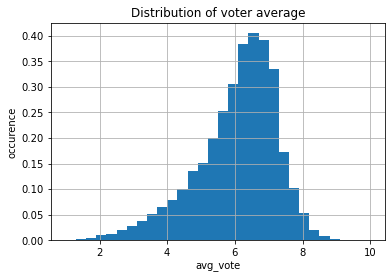

Minimum of Ratings: 1.0
Maximum of Ratings: 10.0
Average of Ratings: 6.0
Variance of Ratings: 1.44


In [108]:
n, bins, patches = plt.hist(upd_ds['avg_vote'], 30, density=1)

plt.xlabel('avg_vote')
plt.ylabel('occurence')
plt.title('Distribution of voter average')
plt.grid(True)
plt.show()

print("Minimum of Ratings:", round(min(upd_ds['avg_vote']),2))
print("Maximum of Ratings:", round(max(upd_ds['avg_vote']),2))
print("Average of Ratings:", round(np.mean(upd_ds['avg_vote']),2))
print("Variance of Ratings:",round(np.var(upd_ds['avg_vote']),2))

In [109]:
# Drop objects from the dataset, if they have more than 50% of missing values

def drop_uninformative_objects(X):
    total_col = len(X.columns)
    X_halfnull = X[(X.isnull().sum(axis=1)) / total_col > 0.5]
    X_subset = X[~X.index.isin(X_halfnull.index)]
    
    return X_subset

In [110]:
X = drop_uninformative_objects(upd_ds)

Separate target variable from the feature matrix.

In [111]:
# y = X['avg_vote']
# X = X.drop(['avg_vote'], axis = 1)

1.2 Explain which task are you going to solve (is it a regression, classification or something else)? 

I will be solving a regression problem - predicting a rating based on a sample of objects with different characteristics. The output should be a real number (1.0, .., 10.0).

1.3 Select a metric. Is it already implemented in sklearn? If yes, import it. If not, it is time to write a function which will calculate it. 

In [143]:
from sklearn.metrics import mean_squared_error

### Part 2.

Explore and preprocess the data


2.2 Explore you data: make plots, print tables. Make sure to write your observations.  Do not forget to fill-in missing values, define relevant columns transformatios. 



In [113]:
print("Types of variables presented in the training data:\n")
X.dtypes

Types of variables presented in the training data:



original_title         object
genre                  object
duration                int64
country                object
language               object
director               object
writer                 object
production_company     object
actors                 object
avg_vote              float64
dtype: object

In [114]:
print("Number of missing values in all column:\n")
X.isnull().sum()

Number of missing values in all column:



original_title           0
genre                    0
duration                 0
country                  0
language                 0
director                24
writer                   0
production_company    2744
actors                   0
avg_vote                 0
dtype: int64

In [115]:
cat_cols = ['director', 'production_company']
X[cat_cols] = X[cat_cols].fillna('Unknown')

In [116]:
def generate_list(df, feature_name):
    
    #Step 1: track all ratings associated with each feature in a dictionary
    feature_dict = {}
    
    for index, row in df.iterrows():
        feat = row[feature_name]
        for sub_feat in feat:
            if sub_feat not in feature_dict:
                feature_dict[sub_feat] = (df['avg_vote'][index], 1) #
            else:
                feature_dict[sub_feat] = (feature_dict[sub_feat][0] + (df['avg_vote'][index]), feature_dict[sub_feat][1] + 1)
    
    #Step 2: calculate average ratings for each feature
    for key in feature_dict:
        feature_dict[key] = feature_dict[key][0] / feature_dict[key][1] #average of all vote_averages
       
    
    #Step 3: create and sort a list of tuples (dictionary value, key)
    lst = list()
    for name in feature_dict:
        lst.append((feature_dict[name],name))
    lst = sorted(lst)
    
    #step 4: create a list of only the feature names, from lowest rating to highest rating
    feature_list = list()
    ratings_list = list()
    for element in lst:
        feature_list.append(element[1])
        ratings_list.append(element[0])
    
    #get the variance of the ratings. This is helpful for determining the usefulness of the information (to be displayed in below plot)
    var = round(np.var(ratings_list),3)
    
    #before returning the list, do a quick visualization to show that generate_list works
    fig, ax = plt.subplots(figsize=(6,5))
    if feature_name != 'genre':
        n = 50 # sample at intervals of n
    else:
        n = 1
        
    X = [] #sample for associated movie(s) rating average
    Y = [] #sample for feature names
    
    for i in range(0, len(feature_list) - 1, n):
        X.append(ratings_list[i])
        Y.append(feature_list[i])
    
    y_pos = np.arange(len(Y))
    ax.barh(y_pos, X, align='center')
    ax.invert_yaxis()
    
    ax.set_xlabel('Overall average movie ratings')
    ax.set_ylabel(feature_name + ' sample list index')
    ax.set_title(feature_name + ' to associated movie(s) performance (' + str(int(len(feature_list)/n)) + ' samples), variance: ' + str(var))
    
    plt.show()
    
    return feature_list

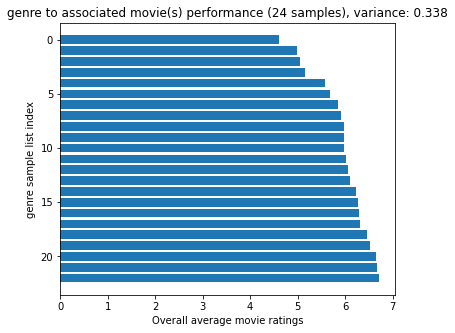

In [117]:
genre_list = generate_list(X, 'genre')

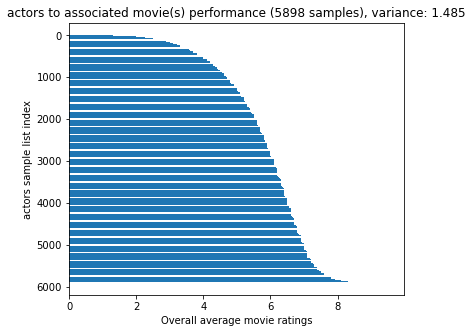

In [118]:
actors_list = generate_list(X, 'actors')

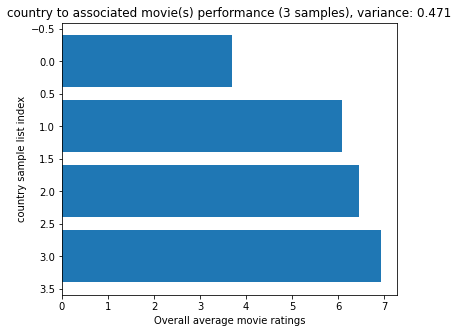

In [119]:
country_list = generate_list(X, 'country')

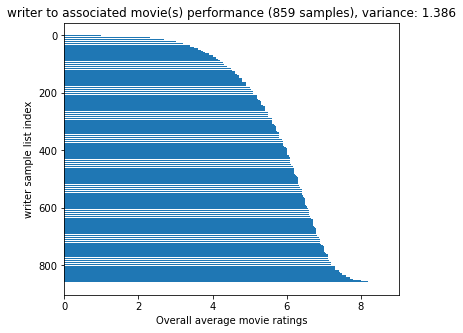

In [120]:
writer_list = generate_list(X, 'writer')

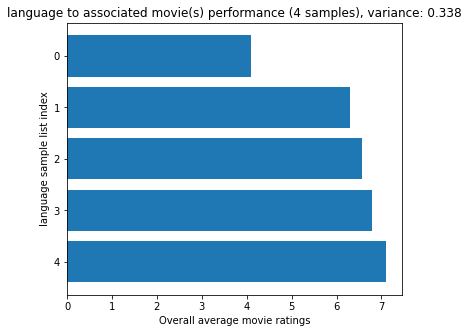

In [121]:
language_list = generate_list(X, 'language')

In [122]:
# X['genre'] = X['genre'].apply(lambda x: calculate_bin_array(x, genre_list))
# X['actors'] = X['actors'].apply(lambda x: calculate_bin_array(x, actors_list))
# X['country'] = X['country'].apply(lambda x: calculate_bin_array(x, country_list))
# X['writer'] = X['writer'].apply(lambda x: calculate_bin_array(x, writer_list))

In [123]:
# X.head(3)

In [124]:
X = X.drop(['original_title', 'director', 'writer', 'production_company', 'actors'], axis = 1)

2.1 Split data into train and test

In [125]:
y = X['avg_vote']
X = X.drop(['avg_vote'], axis = 1)

In [126]:
X.head(3)

,genre,duration,country,language
0,"[Biography, Crime, Drama]",70,[Australia],Unknown
1,[Drama],53,"[Germany, Denmark]",Unknown
2,"[Drama, History]",100,[USA],[English]


In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [128]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42138, 4), (18060, 4), (42138,), (18060,))

### Part 3.

Train and compare the models

3.1. Select models, you are going to train, select hyperparameters that have to be tunes.

In [129]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.base import BaseEstimator, TransformerMixin

In [130]:
class CatPreprocessImputer(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        X = X.fillna('')
        
        bin_country = MultiLabelBinarizer(classes=country_list)
        bin_language = MultiLabelBinarizer(classes=language_list)
        bin_genre = MultiLabelBinarizer(classes=genre_list)

        
        e_country = pd.DataFrame(bin_country.fit_transform(X['country']),    columns=bin_country.classes_)
        e_language = pd.DataFrame(bin_language.fit_transform(X['language']), columns=bin_language.classes_)
        e_genre = pd.DataFrame(bin_genre.fit_transform(X['genre']),          columns=bin_genre.classes_)
        
        #e_country = pd.DataFrame(bin_country.fit_transform(X['country'].str.replace(r'\s', '', regex=True).str.split(pat=',')), columns=bin_country.classes_)
        #e_language = pd.DataFrame(bin_language.fit_transform(X['language'].str.replace(r'\s', '', regex=True).str.split(pat=',')), columns=bin_language.classes_)
        #e_genre = pd.DataFrame(bin_genre.fit_transform(X['genre'].str.replace(r'\s', '', regex=True).str.split(pat=',')), columns=bin_genre.classes_)

        result = pd.concat([e_country, e_language, e_genre], axis=1)
        return result.values

In [135]:
cat_col = ['genre', 'country', 'language']
num_col = ['duration']

num_pipe = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
)

cat_pipe = make_pipeline(
    CatPreprocessImputer(),
)

column_transformer = ColumnTransformer([
    ('num', num_pipe, num_col),
    ('cat', cat_pipe, cat_col)
], remainder='passthrough')

In [134]:
x_trans = column_transformer.fit_transform(X_train)
x_trans.shape

(42138, 442)

In [136]:
model = Pipeline([
    ('column_transformer', column_transformer),
    ('model', GradientBoostingRegressor())
])

model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('column_transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                            

In [137]:
y_pred = model.predict(X_test)

In [146]:
mean_squared_error(y_pred, y_test)

1.0317266288048494

3.2 Use cross-validation to compare models and select best set of hyperparameters

3.3 Which model and setup is the best? How does it perform on the test dataset? If you were to present this model to the client, how would you describe it?